In [3]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt


In [4]:
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [5]:
x_train = (x_train.astype('float32') / 127.5) - 1
x_test = (x_test.astype('float32') / 127.5) - 1


In [6]:
def build_encoder():

    inputs = layers.Input(shape=(32,32,3))

    x = layers.Conv2D(64, 3, strides=2, padding="same")(inputs)
    x = layers.ReLU()(x)

    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(256, 3, strides=2, padding="same")(x)
    x = layers.ReLU()(x)

    return Model(inputs, x, name="Encoder")


In [7]:
def build_decoder():

    inputs = layers.Input(shape=(4,4,256))

    x = layers.Conv2DTranspose(128, 3, strides=2, padding="same")(inputs)
    x = layers.ReLU()(x)

    x = layers.Conv2DTranspose(64, 3, strides=2, padding="same")(x)
    x = layers.ReLU()(x)

    x = layers.Conv2DTranspose(3, 3, strides=2, padding="same")(x)

    outputs = layers.Activation("tanh")(x)

    return Model(inputs, outputs, name="Decoder")


In [8]:
encoder = build_encoder()
decoder = build_decoder()

inputs = layers.Input(shape=(32,32,3))
encoded = encoder(inputs)
decoded = decoder(encoded)

model = Model(inputs, decoded)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder (Functional)            │ (None, 4, 4, 256)      │       370,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 32, 32, 3)      │       370,563 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,379 (2.83 MB)

 Trainable params: 741,379 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer="adam",
    loss="mse"
)


In [10]:
loss="mae"


In [11]:
history = model.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, x_test)
)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0679 - val_loss: 0.0125
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0111 - val_loss: 0.0073
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0075 - val_loss: 0.0057
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


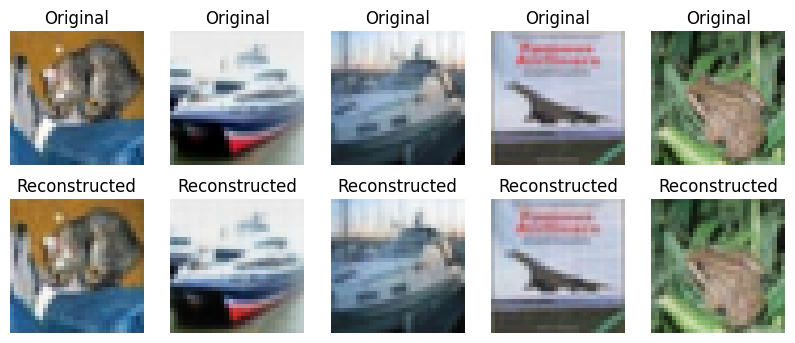

In [12]:
decoded_images = model.predict(x_test[:5])

plt.figure(figsize=(10,4))

for i in range(5):

    # original
    plt.subplot(2,5,i+1)
    plt.imshow((x_test[i]+1)/2)
    plt.title("Original")
    plt.axis("off")

    # reconstructed
    plt.subplot(2,5,i+6)
    plt.imshow((decoded_images[i]+1)/2)
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()
